In [1]:
from helper.loader import load_ratings, load_movies, load_lists
from helper.preprocesser import preprocess_ratings, more_than_N_ratings, create_fake_identities
import helper.network_explorer as ne
import helper.collaborative as coll
from scipy.sparse import csr_matrix
from helper.preprocesser import prepare_test_data_dense, prepare_test_data_sparse
from helper.matrix_factorization import matrix_factorization
import pandas as pd
import numpy as np

## Load data

In [2]:
ratings = load_ratings()
# movies = load_movies()
lists = load_lists()

## Preprocess data
Remove users with 0 or few ratings

In [3]:
ratings_new, lists_new = preprocess_ratings(ratings, lists, min_ratings = 500)
# print(f'{round((len(ratings) - len(ratings_new)) / len(ratings) * 100, 2)} % of ratings removed (out of {len(ratings)})')
# print(f'{round((len(lists) - len(lists_new)) / len(lists) * 100, 2)} % lists removed (out of {len(lists)})')

In [4]:
ratings

,movie_id,rating_id,rating_score,user_id
0,1066,15610495,3.0,41579158
1,1066,10704606,2.0,85981819
2,1066,10177114,2.0,4208563
3,1066,10130280,3.0,9820140
4,1066,8357049,4.0,68654088
...,...,...,...,...
15459940,1065,35403,4.0,39480101
15459941,1065,27955,4.0,60235331
15459942,1065,26731,4.0,42678387
15459943,1065,25765,3.0,18576002


In [5]:
ratings_new.groupby('user_id').count()

,movie_id,rating_id,rating_score
user_id,,,
2941,1423,1423,1423
14464,598,598,598
15344,726,726,726
29237,2122,2122,2122
78410,1403,1403,1403
...,...,...,...
99909118,980,980,980
99927639,923,923,923
99942902,1097,1097,1097


## Generate fake names

In [6]:
names_dict = create_fake_identities(np.unique(ratings_new['user_id']))
names_dict

{2941: 'Lori Delacruz',
 14464: 'Michael Williams',
 15344: 'Kimberly Andrews',
 29237: 'David Henderson',
 78410: 'Jeffery Baker',
 83575: 'Tara Howard',
 94978: 'Audrey Baldwin',
 99812: 'Brittney Pennington',
 114207: 'Lisa Wright',
 118503: 'Nicole Smith',
 118841: 'Ryan Harvey',
 126081: 'Robert Ray DVM',
 182362: 'Heather Mooney',
 192361: 'Christopher Jackson',
 194932: 'Jill Sharp',
 200681: 'Cheryl Schultz',
 204061: 'Travis Sellers',
 225373: 'Sean Molina',
 230594: 'Amber Andrews',
 234133: 'Michael Brown',
 243873: 'Heather Cruz',
 257723: 'Jennifer Schroeder',
 282614: 'Randall Ellis',
 296639: 'Amber Miller',
 325746: 'Megan Brooks',
 373153: 'Laura Johnson',
 396670: 'Kent Boyer',
 397936: 'Amanda Martinez',
 400845: 'Michelle Smith',
 404311: 'Albert Elliott',
 410815: 'Christopher Burton',
 426717: 'Albert Mckay',
 452234: 'Earl Robbins',
 457561: 'Lori Newman',
 460509: 'Stephen Morris',
 463202: 'Tammy Martinez',
 468202: 'Timothy Marshall',
 483726: 'James Salinas',

## Explore data

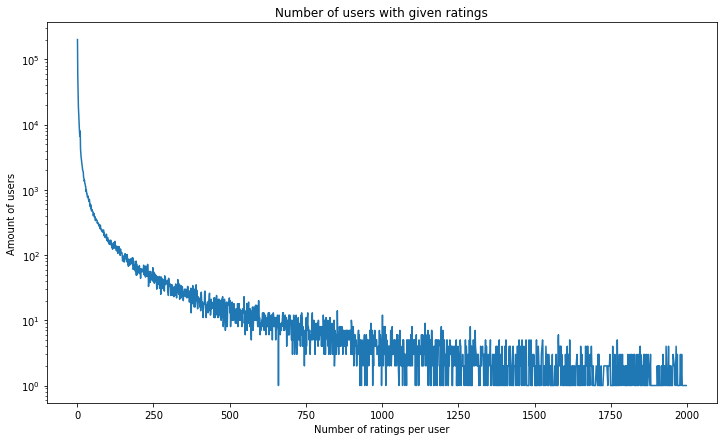

In [7]:
vc1 = ne.plot_nb_of_ratings(ratings, max_val=2000)

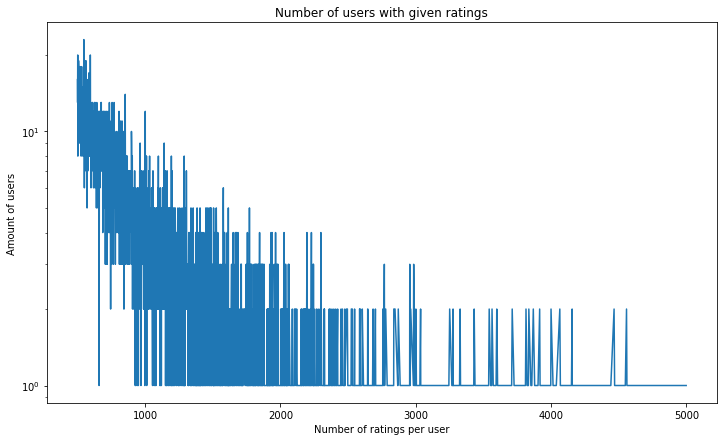

In [8]:
vc2 = ne.plot_nb_of_ratings(ratings_new, max_val=5000)

In [9]:
# vc2[0].min()

In [10]:
# vc

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
array1 = np.array(list(vc1))
array2 = np.array(list(vc1))
vc_c1 = np.unique(array1, return_counts=True)
vc_c2 = np.unique(array2, return_counts=True)

In [13]:
# sum(vc_c[1]*vc_c[0])

In [14]:
# sns.kdeplot(x=vc_c[0])
# # plt.yscale('log')
# plt.xlim([0, 20000])

In [15]:
# plt.figure(figsize=(12, 7))
# plt.plot(vc_c[0], vc_c[1])
# sns.histplot(x=vc_c[0], y=vc_c[1], kde=True)
# plt.yscale('log')

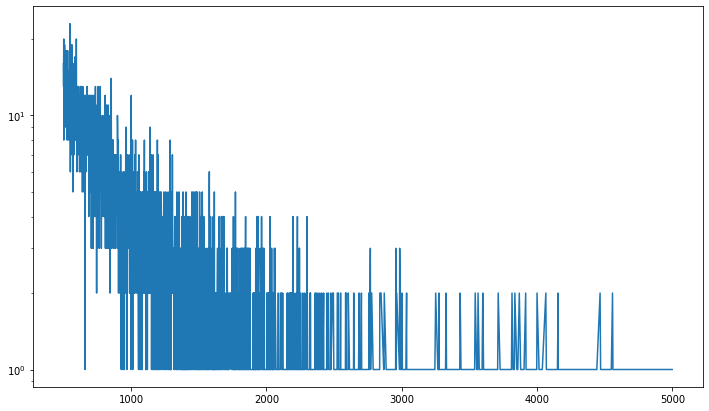

In [16]:
plt.figure(figsize=(12, 7))
plt.plot(vc2[0], vc2[1])
plt.yscale('log')
# plt.xscale('log')
# plt.axvline(0, color='r')
# plt.axvline(20, color='g')

In [17]:
# plt.figure(figsize=(12, 7))
# plt.plot(vc_c[0], vc_c[1])
# plt.yscale('log')

In [18]:
# plt.hist(vc_c[0], bins=200)
# plt.yscale('log')

In [19]:
user_item_matrix, user_id, movie_id = coll.get_sparse_user_item(ratings_new)

In [20]:
user_item_matrix

<6547x136555 sparse matrix of type '<class 'numpy.float64'>'
	with 8052975 stored elements in Compressed Sparse Row format>

In [21]:
import itertools
import random

In [22]:
cx = user_item_matrix.tocoo()    
# for i,j,v in zip(cx.row, cx.col, cx.data):
#     print(v)
    
print(len(user_item_matrix.nonzero()[0]))
random.sample(range(len(cx.nonzero()[0])), 2)
# print(user_item_matrix.nonzero())
# print(cx.nonzero())

8052975


[2664365, 6628743]

In [23]:
user_item_matrix

<6547x136555 sparse matrix of type '<class 'numpy.float64'>'
	with 8052975 stored elements in Compressed Sparse Row format>

In [24]:
user_item_matrix.nonzero()[1][1] = 0
user_item_matrix.eliminate_zeros()

In [25]:
user_item_matrix

<6547x136555 sparse matrix of type '<class 'numpy.float64'>'
	with 8052975 stored elements in Compressed Sparse Row format>

In [26]:
import pandas as pd
a = pd.DataFrame([[1,2,2,None,2],[1,2,2,3,2],[1,2,2,None,None]])

In [27]:
a

,0,1,2,3,4
0,1,2,2,NaN,2.0
1,1,2,2,3.0,2.0
2,1,2,2,NaN,NaN


In [28]:
for i in a.notna().index:
    print(i)

0
1
2


In [29]:
a = a.fillna(0)

In [30]:
m = csr_matrix(a)
m.eliminate_zeros()

In [31]:
m

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [32]:
print(m)

  (0, 0)	1.0
  (0, 1)	2.0
  (0, 2)	2.0
  (0, 4)	2.0
  (1, 0)	1.0
  (1, 1)	2.0
  (1, 2)	2.0
  (1, 3)	3.0
  (1, 4)	2.0
  (2, 0)	1.0
  (2, 1)	2.0
  (2, 2)	2.0


In [33]:
m.nonzero()

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2], dtype=int32),
 array([0, 1, 2, 4, 0, 1, 2, 3, 4, 0, 1, 2], dtype=int32))

In [34]:
test_m = pd.DataFrame([[1,2,2,None,2],[1,2,2,3,2],[1,2,2,None,None]])
b, dic = prepare_test_data_dense(test_m, 0.1)

100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 1163.15it/s]


In [35]:
test_m

,0,1,2,3,4
0,1,2,2,NaN,2.0
1,1,2,2,3.0,2.0
2,1,2,2,NaN,NaN


In [36]:
b

,0,1,2,3,4
0,1,2,2.0,NaN,2.0
1,1,2,NaN,3.0,2.0
2,1,2,2.0,NaN,NaN


In [37]:
dic

{(1, 2): 2}

In [38]:
sparse_m = csr_matrix(test_m.fillna(0))

In [39]:
sparse_m

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [40]:
sparse_m.eliminate_zeros()
sparse_m.todense()

matrix([[1., 2., 2., 0., 2.],
        [1., 2., 2., 3., 2.],
        [1., 2., 2., 0., 0.]])

In [41]:
sparse_m[0,0] = 3

In [42]:
sparse_m.todense()

matrix([[3., 2., 2., 0., 2.],
        [1., 2., 2., 3., 2.],
        [1., 2., 2., 0., 0.]])

In [43]:
sparse_m_2 = sparse_m.copy()

In [44]:
c, dic2 = prepare_test_data_sparse(sparse_m, .5)

100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 7748.10it/s]


In [45]:
c

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [46]:
c.todense()

matrix([[0., 0., 2., 0., 2.],
        [1., 0., 2., 3., 0.],
        [1., 0., 0., 0., 0.]])

In [47]:
dic2

{(0, 1): 2.0, (1, 1): 2.0, (0, 0): 3.0, (1, 4): 2.0, (2, 2): 2.0, (2, 1): 2.0}

In [4]:
sparse_user_item, _, _ = coll.get_sparse_user_item(ratings_new)

In [5]:
sparse_user_item

<6547x136555 sparse matrix of type '<class 'numpy.float64'>'
	with 8052975 stored elements in Compressed Sparse Row format>

In [5]:
reduced_user_item, dic = prepare_test_data_sparse(sparse_user_item, .001)

100%|████████████████████████████████████| 8052/8052 [00:00<00:00, 15301.86it/s]


In [51]:
reduced_user_item

<6547x136555 sparse matrix of type '<class 'numpy.float64'>'
	with 7972446 stored elements in Compressed Sparse Row format>

In [ ]:
matrix_factorization(R=reduced_user_item, K=5, alpha=0.002, lambda_=0.02, max_iter=5)

1000it [00:00, 3317.35it/s]


before transpose
before second loop
